##### Load some packages and previous functions

In [1]:
#The following packages are required to read and write files, as well as generate linear algebra calculations
using DelimitedFiles, Plots, LaTeXStrings, StatsBase, LinearAlgebra, QuadGK

#The following files with Julia functions are required
include("voronoi.jl")
include("Quasicrystals.jl")

centroids_2_Vertices (generic function with 1 method)

##### Define the function to calculate the areas of the rhombuses

In [2]:
function Area(XX,YY)
    A = 0
    for i in 1:4
        A += XX[i]*YY[i+1]-YY[i]*XX[i+1]  
    end
    A *= 1/2
    return abs(A)
end

Area (generic function with 1 method)

##### Generate the tesellation and calculate the area of the rhombuses as well as the length of their minor semiaxis

In [ ]:
#Set of parameter to generate the main clusters
SL = 1e6;
NSides = 1009;
Notebook = 1;
Precision = BigFloat;
α = 0.0;
β = 0;
AreaBound = 1.2;

Number_Vertices = 1000000; #Total number of vertices to analyze
Complete_Array_Areas = []; #Array with all the areas of the Voronoi's Polygons from all the patches
i=1; #Counter to know the actual iteration

while length(Complete_Array_Areas) < Number_Vertices
    open("Estado_SAD_N$(NSides)_$(Notebook).txt", "w") do file
        write(file, "Estamos calculando el parche $(i); se han analizado $(length(Complete_Array_Areas)) vértices.")
    end
    
    APoint = arb_Point(SL);
    X,Y = main_Cluster(NSides,Precision,α,β,APoint,AreaBound,true,false)
    
    Areas_Array = [Area([X[i], X[i+1], X[i+2], X[i+3], X[i]], [Y[i], Y[i+1], Y[i+2], Y[i+3], Y[i]]) for i in 1:4:length(X)]
    Complete_Array_Areas = vcat(Complete_Array_Areas, Areas_Array)
    i+=1;
end

#Calculo del semieje menor.
θs = asin.(Complete_Array_Areas);
ls = sqrt.(2 .- 2* cos.(θs));

writedlm("Minor_Semiaxis_Length_Distribution_N$(NSides)_$(Notebook).csv", ls, ',')

## Visualization of the Data

In [3]:
NSides = 1009
Data = readdlm("Minor_Semiaxis_Length_Distribution_N$(NSides)_1.csv");
Data = [Data[i] for i in 1:length(Data)];

In [86]:
#=
ASet = [sqrt(2 - 2*cos(i*π/NSides)) for i in 0:2:(NSides-1)];
sort!(ASet)
ASet[findfirst(x -> x > sqrt(2), ASet)]
=#

In [4]:
ASet = [sqrt(2 - 2*cos(i*π/NSides)) for i in 0:1:(NSides-1)];
filter!(x -> x <= sqrt(2), ASet);
BinSet = [(ASet[i] + ASet[i+1])/2 for i in 1:(length(ASet)-1)];
insert!(BinSet, 1, 0.0);
h = StatsBase.fit(Histogram, Data, BinSet, closed=:right);
#h = normalize(h, mode=:pdf);
PromBin = mean(BinSet[i+1] - BinSet[i] for i in 1:(length(BinSet)-1))

0.0028016067359920866

In [88]:
#h2 = [h.weights[i]*(h.edges[1][i+1] - h.edges[1][i])/PromBin for i in 1:length(h.weights)];

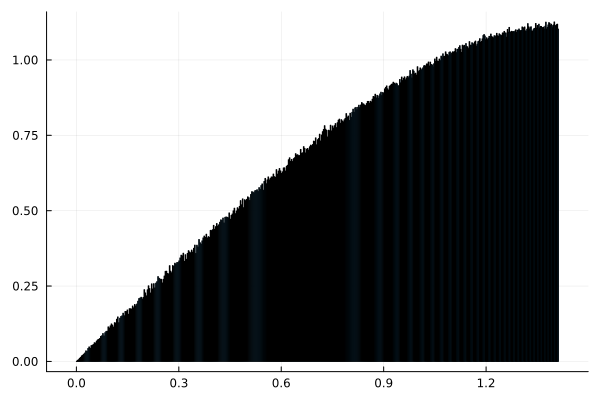

In [5]:
bar(h.edges, h.weights/(sum(h.weights)*PromBin), legend = false)

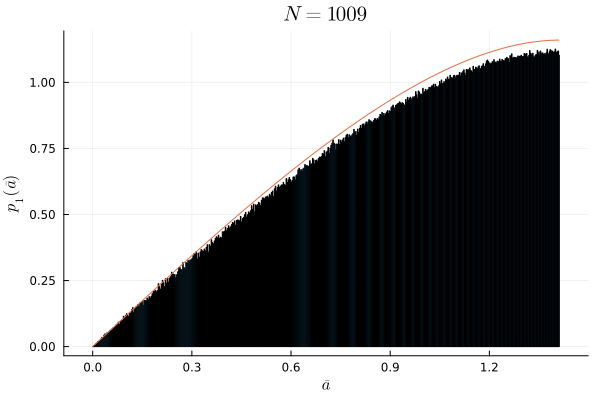

In [6]:
function f(x)
    sin(acos(1 - (x^2/2)))
end

A = 1/(quadgk(f, 0, sqrt(2), rtol=1e-3)[1]);
#A = 1.12;

plot!(0:0.005:sqrt(2), A*f.(0:0.005:sqrt(2)), title = L"N = %$(NSides)", xlabel = L"\bar{a}", ylabel = L"p_{1}(\bar{a})")

### Corrección de normalización de Ata

In [3]:
gr()
NSides = 1009;
Data = readdlm("Minor_Semiaxis_Length_Distribution_N$(NSides)_1.csv");
Data = [Data[i] for i in 1:length(Data)];
A = 1/sum(sin(2*π*i/NSides) for i in 1:1:floor(Int,((NSides)/2)));
BinSet = [minimum(Data)+(i-1)/NSides*sqrt(2) for i in 1:(NSides+1)];
h = StatsBase.fit(Histogram, Data, BinSet, closed=:right);
h = normalize(h, mode=:probability)
bar(h.edges[1][1:end-1], h.weights,
    #label = "",
    label = L"N=%$(NSides)",
    color = :gray,
    legend = :topleft,
    #legend = false,
    grid = false,
    alpha = 0.5,
    bar_width = sqrt(2)/(1000*NSides),
    bar_strokewidth = 0)

function f(x)
    sin(acos(1 - (x^2/2)))
end

f (generic function with 1 method)

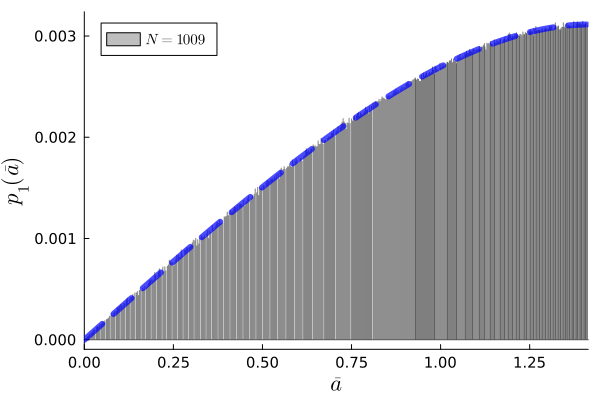

In [4]:
plot!(0:0.005:sqrt(2), A*f.(0:0.005:sqrt(2)),
    xlimit=[0.0, sqrt(2)],
    #title = L"N = %$(NSides)",
    #legend = :topleft,
    label = "",
    xlabel = L"\bar{a}",
    ylabel = L"p_1(\bar{a})",
    color = "blue",
    linealpha = 0.7,
    linestyle =:dash, 
    linewidth = 6,
    #titlefont=font(20),
    legendfont=font(10),
    tickfont=font(10),
    guidefont=font(15))

In [5]:
savefig("Minor_Axis_Dist_High_Sym.pdf")